<a href="https://colab.research.google.com/github/anjithsm/DataScience/blob/main/Virtual_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [86]:
import pandas as pd
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, index = labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [4]:
summary = df.describe(include = 'all')
summary

,animal,age,visits,priority
count,10,8.000000,10.000000,10
unique,3,NaN,NaN,2
top,cat,NaN,NaN,no
freq,4,NaN,NaN,6
mean,NaN,3.437500,1.900000,NaN
std,NaN,2.007797,0.875595,NaN
min,NaN,0.500000,1.000000,NaN
25%,NaN,2.375000,1.000000,NaN
50%,NaN,3.000000,2.000000,NaN
75%,NaN,4.625000,2.750000,NaN


**3.** Return the first 3 rows of the DataFrame `df`.

In [6]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [8]:
df[['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [12]:
df.loc[df.index[[3,4,8]],['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**6.** Select only the rows where the number of visits is greater than 3.

In [13]:
df[df['visits']>3]

,animal,age,visits,priority


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [20]:
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [25]:
cats = df[(df['animal'] == 'cat') & (df['age']<3)]
cats

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [26]:
ages_2n4 = df[(df['age'] >= 2) & (df['age'] <= 4)]
ages_2n4

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**10.** Change the age in row 'f' to 1.5.

In [31]:
change_age = df['age']['f'] = 1.5
df

<ipython-input-31-6d3952ec0aa0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  change_age = df['age']['f'] = 1.5


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [34]:
sum_visits = df['visits'].sum()
sum_visits

19

**12.** Calculate the mean age for each different animal in `df`.

In [36]:
mean_age = df.groupby('animal')['age'].mean()
mean_age

,age
animal,
cat,2.333333
dog,5.000000
snake,2.500000


**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [87]:
new_row = pd.DataFrame({'animal': ['rabbit'], 'age': [3], 'visits': [3], 'priority': ['yes']}, index=['k'])
df = pd.concat([df,new_row])
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [88]:
df = df.drop('k')

In [89]:
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**14.** Count the number of each type of animal in `df`.

In [37]:
count_animal = df.groupby('animal')['age'].mean()
count_animal

,age
animal,
cat,2.333333
dog,5.000000
snake,2.500000


**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [77]:
sort = df.sort_values(by = ['age','visits'], ascending = [False,True])
sort

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,2.0,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [90]:
priority_change = df['priority'].replace({'yes':True, 'no':False})
priority_change

,priority
a,True
b,True
c,False
d,True
e,False
f,False
g,False
h,True
i,False
j,False


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [81]:
df['animal'] = df['animal'].replace('snake', 'python')
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,python,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,python,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**18.** Load the ny-flights dataset to Python

In [91]:
df2 = pd.read_csv("/content/ny-flights.csv")
df2

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00


**19.** Which airline ID is present maximum times in the dataset

In [93]:
max = df2['airline_id'].max()
max

21171

**20.** Draw a plot between dep_delay and arr_delay

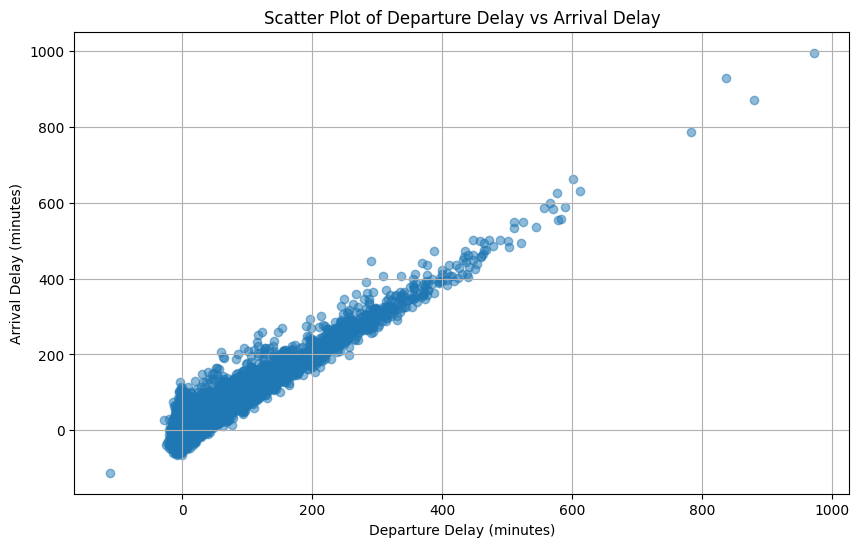

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df2['dep_delay'],df2['arr_delay'], alpha=0.5)
plt.title('Scatter Plot of Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True)
plt.show()

# **Diabetes Dataset EDA**

In [98]:
import matplotlib.pyplot as plt

In [99]:
df3 = pd.read_csv('/content/diabetes_model.csv')
df3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,77,82,41,42,35.8,0.156,35,0
1,9,122,56,0,0,33.3,1.114,33,1
2,0,113,76,0,0,33.3,0.278,23,1
3,1,139,62,41,480,40.7,0.536,21,0
4,10,161,68,23,132,25.5,0.326,47,1
...,...,...,...,...,...,...,...,...,...
609,4,114,64,0,0,28.9,0.126,24,0
610,2,175,88,0,0,22.9,0.326,22,0
611,3,121,52,0,0,36.0,0.127,25,1
612,7,136,74,26,135,26.0,0.647,51,0


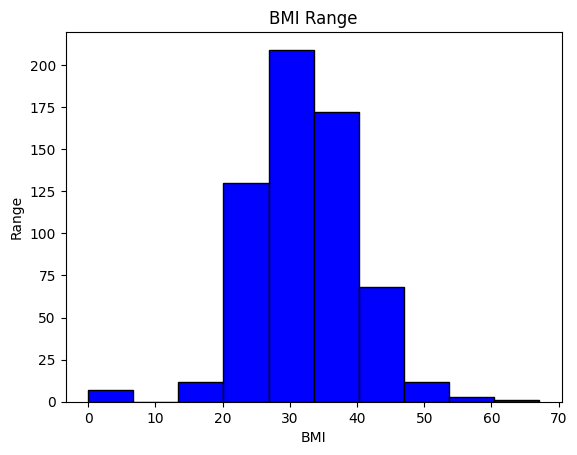

In [104]:
#Univariate Analysis

plt.hist(df3['BMI'],bins=10, color='Blue', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Range')
plt.title('BMI Range')
plt.show()

This graph provides insights into the distribution of BMIs in the dataset, emphasizing the central range of 20-30

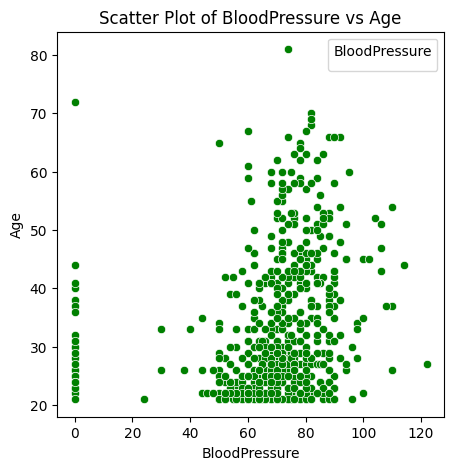

In [118]:
# Bivariate Analysis
import seaborn as sns
plt.figure(figsize=(5,5))
sns.scatterplot(x='BloodPressure', y='Age', data=df3, color = 'Green')
plt.title('Scatter Plot of BloodPressure vs Age')
plt.xlabel('BloodPressure')
plt.ylabel('Age')
plt.legend(title='BloodPressure')
plt.show()

From this we can infer that most of the patients in age group  20 to 40 have a normal blood pressure

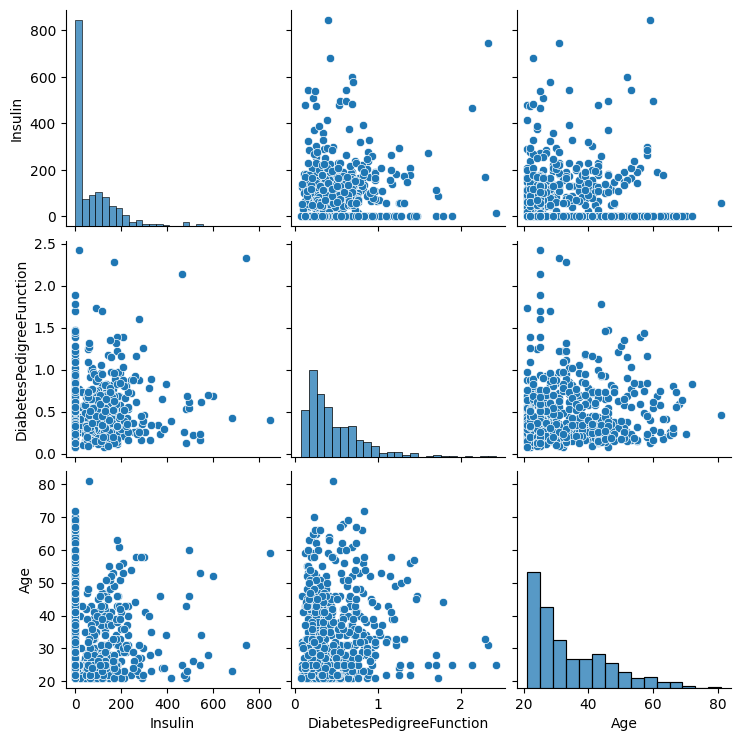

In [122]:
# Multivariate Analysis
sns.pairplot(df3[['Insulin', 'DiabetesPedigreeFunction', 'Age']])
plt.show()


1.   Histograms:
  The histograms along the diagonal show the distribution of each variable. For example, the BMI histogram reveals the spread of body mass index values. Similarly, the other histograms provide insights into insulin levels, diabetes pedigree function, and age distribution.

2.   Scatter Plots:The off-diagonal elements display scatter plots for pairs of variables. BMI vs. Insulin: There’s no clear linear relationship; insulin levels vary widely across different BMIs.
BMI vs. DiabetesPedigreeFunction: No obvious correlation.
Insulin vs. Age and DiabetesPedigreeFunction vs. Age: No strong linear trends. Clusters or patterns might exist in certain scatter plots, indicating subgroups or outliers.

3.  Overall Insights:
This graph matrix allows quick visual assessment of correlations between multiple variables. It’s useful for identifying trends or patterns that warrant further investigation.